In [13]:
import numpy as np
import sklearn
from sklearn import datasets,linear_model
import matplotlib.pyplot as plt
import time

# Generating a dataset

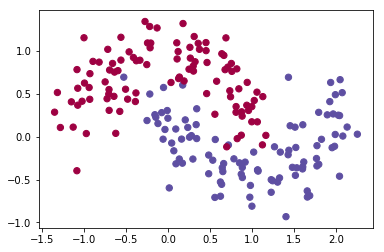

In [2]:
#generate dataset 
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [3]:
# function to draw label's boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    # create each grid point xx for x value  and yy for y value
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    # predict grid point belongs to which label
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Logistic Regression

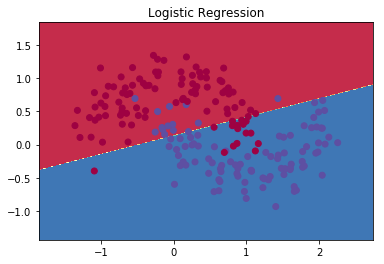

In [4]:
# Train the logistic rgeression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

# Neural Network

<img src="https://www.researchgate.net/profile/Daniel_Cozzolino/publication/222083284/figure/fig1/AS:305169851011072@1449769570268/Fig-1-Example-of-a-feed-forward-back-propagation-ANN-model-for-I-input-variables-x-i.png" width="450">

### Forward

![title](http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++z_1+%26+%3D+xW_1+%2B+b_1+%5C%5C++a_1+%26+%3D+%5Ctanh%28z_1%29+%5C%5C++z_2+%26+%3D+a_1W_2+%2B+b_2+%5C%5C++a_2+%26+%3D+%5Chat%7By%7D+%3D+%5Cmathrm%7Bsoftmax%7D%28z_2%29++%5Cend%7Baligned%7D&bg=ffffff&fg=000&s=0)





### Backward

<img src = "http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++%26+%5Cdelta_3+%3D+%5Chat%7By%7D+-+y+%5C%5C++%26+%5Cdelta_2+%3D+%281+-+%5Ctanh%5E2+z_1%29+%5Ccirc+%5Cdelta_3W_2%5ET+%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7BW_2%7D%7D+%3D+a_1%5ET+%5Cdelta_3+%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7Bb_2%7D%7D+%3D+%5Cdelta_3%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7BW_1%7D%7D+%3D+x%5ET+%5Cdelta2%5C%5C++%26+%5Cfrac%7B%5Cpartial%7BL%7D%7D%7B%5Cpartial%7Bb_1%7D%7D+%3D+%5Cdelta2+%5C%5C++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0" width="150">



In [5]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

#activate_function = "sigmoid"
activate_function = "relu"

### Caculate Loss

If we have N training examples and C classes then the loss for our prediction ŷ with respect to the true labels y is given by:

<img src = "http://s0.wp.com/latex.php?latex=%5Cbegin%7Baligned%7D++L%28y%2C%5Chat%7By%7D%29+%3D+-+%5Cfrac%7B1%7D%7BN%7D+%5Csum_%7Bn+%5Cin+N%7D+%5Csum_%7Bi+%5Cin+C%7D+y_%7Bn%2Ci%7D+%5Clog%5Chat%7By%7D_%7Bn%2Ci%7D++%5Cend%7Baligned%7D++&bg=ffffff&fg=000&s=0" width = "300">


In [6]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    if activate_function == "sigmoid":
        a1 = np.tanh(z1)
    else :
        a1 = np.maximum(z1,0)
        
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Predict

In [7]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    if activate_function == "sigmoid":
        a1 = np.tanh(z1)
    else :
        a1 = np.maximum(z1,0)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [8]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        if activate_function == "sigmoid":
            a1 = np.tanh(z1)
        else :
            a1 = np.maximum(z1,0)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        # why -1 => actual probabiliy should be 1
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        if activate_function == "sigmoid":
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)
        else :
            delta2 = delta3.dot(W2.T)
            tmp_delta2 = delta2.copy()
            tmp_delta2[z1 < 0] = 0
            dW1 = np.dot(X.T, tmp_delta2)
            db1 = np.sum(tmp_delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

# Sigmoid Activate Function vs Relu Activate Function

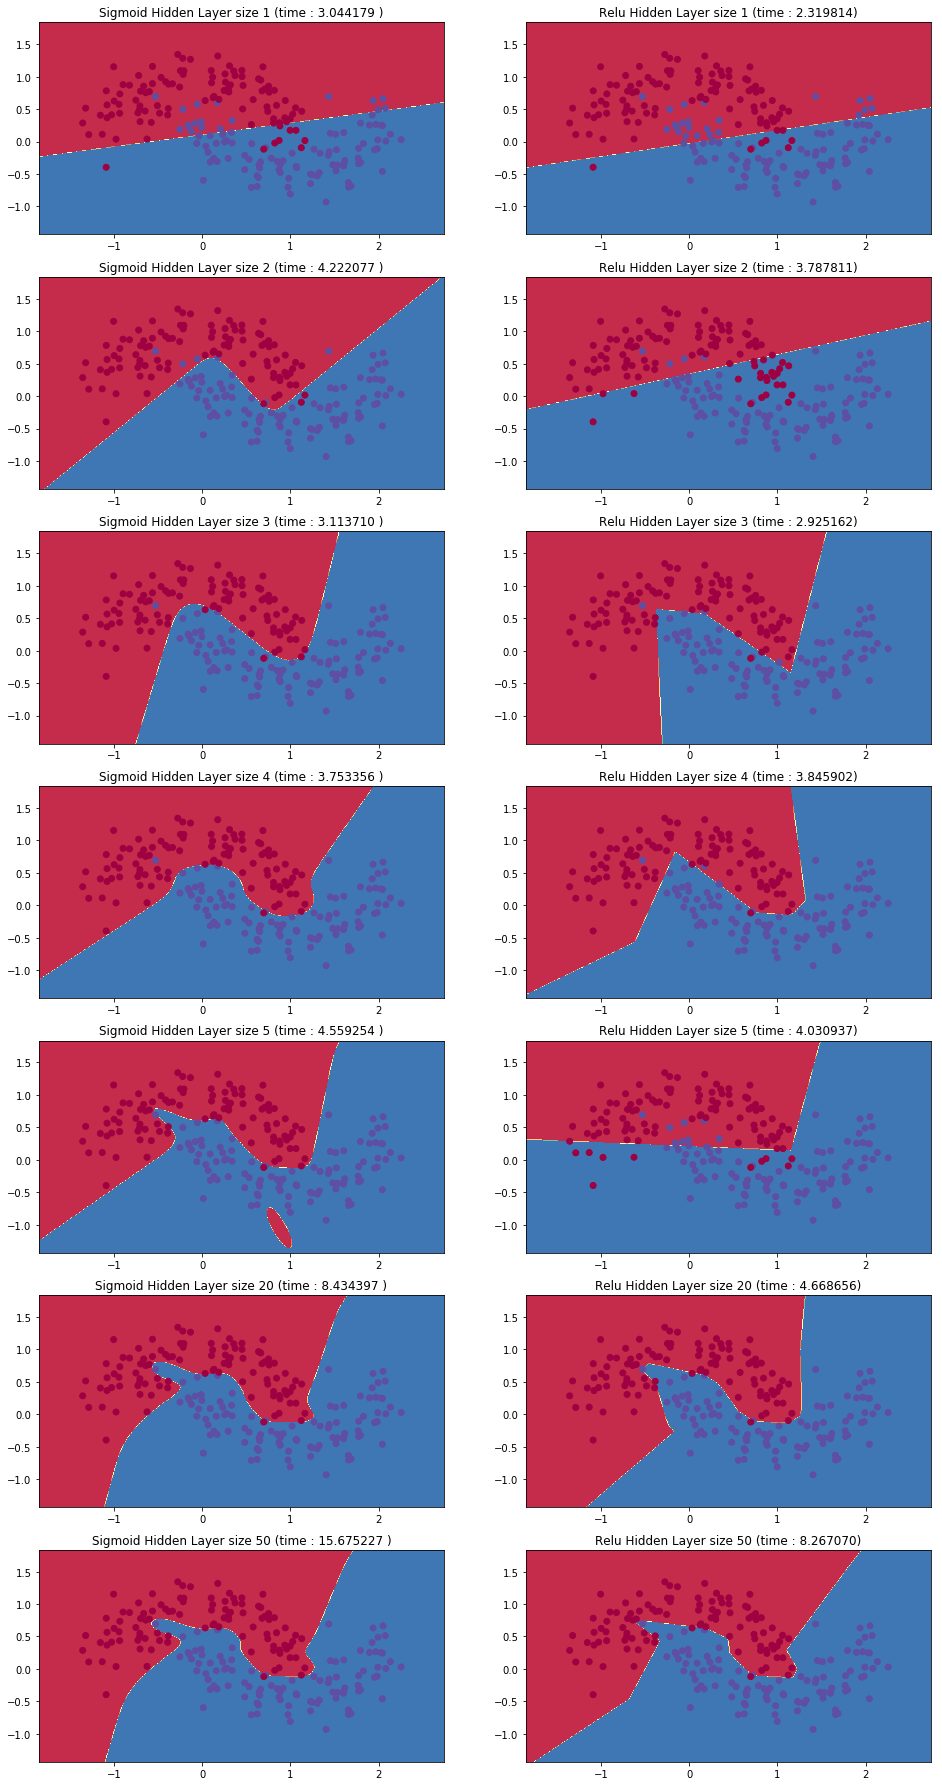

In [22]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    start_time = time.time()
    activate_function = "sigmoid"
    plt.subplot(7, 2, 2*i+1)    
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
    endtime = time.time()
    plt.title("Sigmoid Hidden Layer size %d (time : %f )" % (nn_hdim , (endtime - start_time)))
    
    start_time = time.time()
    activate_function = "relu"
    plt.subplot(7, 2, 2*i+2)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
    endtime = time.time()
    plt.title("Relu Hidden Layer size %d (time : %f)" % (nn_hdim , (endtime - start_time)))
    
plt.show()

reference : http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/